In [94]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import datetime

In [95]:
# def convert_time_to_seconds(time_list):
#     hours = int(time_list[0]) if len(time_list) > 0 else 0
#     minutes = int(time_list[1]) if len(time_list) > 1 else 0
#     seconds = int(time_list[2]) if len(time_list) > 2 else 0
#     total_seconds = hours * 3600 + minutes * 60 + seconds
#     return total_seconds
def convert_time_to_seconds(time_value):
    if isinstance(time_value, list):
        time_str = ':'.join(time_value)
    else:
        time_str = time_value
    
    parts = time_str.split(':')
    if len(parts) == 3:
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(float(parts[2]))  # Convertir segundos a entero
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    else:
        return 0

In [96]:
data = pd.read_csv('caminata.csv', encoding='latin-1', delimiter=';', header=0)
data.head(3)

,name,day,month,year,age,weight,size,seat_height,waist,average_rate,average_cadence,number_steps,calories,average_speed,average_stride,average_heart_rate,average_max_heart_rate
0,"CHUCO TACCA, Gabriel Alberto",24.0,3.0,2010.0,12.0,"50,9","143,8","73,5","86,1",0:32:47,37,990.0,148,1.83,81,118,128
1,"FIESTAS PAZ, Jose Edilberto",3.0,11.0,2009.0,13.0,"40,9",156,"77,5","64,5",0:17:55,63,1012.0,112,3.35,88,123,150
2,"HUACHACA HURTADO, Jhon Dayron",12.0,7.0,2009.0,13.0,57,"159,7","82,5","84,2",0:08:22,112,2355.0,252,6.40,95,153,176


In [97]:
# limpieza de los datos
data['weight'] = data['weight'].str.replace(',', '.')
data['weight'] = data['weight'].astype(float)

data['size'] = data['size'].str.replace(',', '.')
data['size'] = data['size'].astype(float)

data['seat_height'] = data['seat_height'].str.replace(',', '.')
data['seat_height'] = data['seat_height'].astype(float)

data['waist'] = data['waist'].str.replace(',', '.')
data['waist'] = data['waist'].astype(float)

data['average_rate'] = data['average_rate'].str.split(':')
data['average_rate'] = data['average_rate'].apply(convert_time_to_seconds)
data.dropna(inplace=True)



In [98]:
selected_columns = ['age', 'weight', 'size', 'seat_height', 'waist', 'average_rate', 'average_cadence',
                    'number_steps', 'calories', 'average_speed', 'average_stride', 'average_heart_rate',
                    'average_max_heart_rate']

In [91]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[selected_columns])

In [99]:
# Entrenar el modelo de clustering (K-Means)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Obtener las etiquetas de los clusters
cluster_labels = kmeans.labels_

# Añadir las etiquetas al dataframe original
data['cluster'] = cluster_labels

# Imprimir los resultados
print(data['cluster'].value_counts())
print(data.head(3))

0    174
1    153
Name: cluster, dtype: int64
                            name   day  month    year   age  weight   size  \
0   CHUCO TACCA, Gabriel Alberto  24.0    3.0  2010.0  12.0    50.9  143.8   
1    FIESTAS PAZ, Jose Edilberto   3.0   11.0  2009.0  13.0    40.9  156.0   
2  HUACHACA HURTADO, Jhon Dayron  12.0    7.0  2009.0  13.0    57.0  159.7   

   seat_height  waist  average_rate  average_cadence  number_steps  calories  \
0         73.5   86.1          1967               37         990.0       148   
1         77.5   64.5          1075               63        1012.0       112   
2         82.5   84.2           502              112        2355.0       252   

   average_speed  average_stride  average_heart_rate  average_max_heart_rate  \
0           1.83              81                 118                     128   
1           3.35              88                 123                     150   
2           6.40              95                 153                     176   


/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


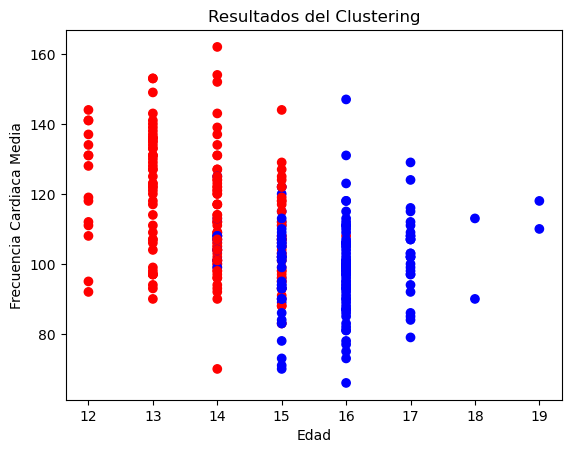

In [102]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes tus datos y las etiquetas de cluster asignadas en el DataFrame "data"

# Obtener las coordenadas X e Y para el gráfico de dispersión
X = data['age']
Y = data['average_heart_rate']

# Obtener las etiquetas de cluster
cluster_labels = data['cluster']

# Crear un diccionario de colores para asignar un color a cada etiqueta de cluster
colors = {0: 'red', 1: 'blue',2: 'green'}  # Agrega más colores si tienes más clusters

# Crear el gráfico de dispersión
plt.scatter(X, Y, c=[colors[label] for label in cluster_labels])

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia Cardiaca Media')
plt.title('Resultados del Clustering')

# Mostrar el gráfico
plt.show()


In [78]:
# Datos del nuevo estudiante
new_student = {
    'age': 14,
    'weight': 45.5,
    'size': 155.0,
    'seat_height': 75.0,
    'waist': 60.0,
    'average_rate': 1800,
    'average_cadence': 50,
    'number_steps': 1200,
    'calories': 200,
    'average_speed': 2.5,
    'average_stride': 80,
    'average_heart_rate': 110,
    'average_max_heart_rate': 140
}

# Escalar los datos del nuevo estudiante
scaled_student = scaler.transform([list(new_student.values())])

# Predecir el cluster del nuevo estudiante
predicted_cluster = kmeans.predict(scaled_student)[0]

# Imprimir el resultado
print("Cluster asignado al nuevo estudiante:", predicted_cluster)

Cluster asignado al nuevo estudiante: 0


/home/sandokan/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
